# Описание задачи классификации

## Описание задачи:

### Обучение модели для предсказания была ли положительная рекомендация по имеющимся признакам.

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка и чтение данных

## Загружаем датасет с данными

### Выбираем только определённые столбцы:

* game - название игры, соответствующее appid

* language - язык, указанный пользователем при написании отзыва

* voted_up - true означает, что это была положительная рекомендация

* votes_up - количество пользователей, которые нашли этот отзыв полезным

* votes_funny - количество пользователей, которые нашли этот обзор забавным

* comment_count - количество комментариев, оставленных к этому обзору

* steam_purchase - true, если пользователь купил игру в Steam

* received_for_free - rue, если пользователь установил флажок, говорящий, что он получил приложение бесплатно

* written_during_early_access - true, если пользователь опубликовал этот обзор, когда игра находилась в раннем доступе.

In [2]:
import copy

df = pd.read_csv("weighted_score_above_08.csv", sep=',', engine="python")
# df = pd.read_csv("dataset.csv", sep=',', engine="python")
df_columns = ['game', 'language', 'voted_up', 'votes_up', 'votes_funny', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access']
df = df.loc[:,df_columns]
df_number_columns = ['votes_up', 'votes_funny', 'comment_count']
df_string_columns = ['game', 'language']

### Убираем лишние данные

In [3]:
games = df['game'].value_counts()[df['game'].value_counts() <= 250].keys()

for game in games:
    df.drop(df[df['game'] == game].index, inplace = True)

df.to_csv('dataset.csv')

### Вычисление основных характеристик

In [4]:
df.describe()

,voted_up,votes_up,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access
count,200971.000000,200971.000000,2.009710e+05,200971.000000,200971.000000,200971.000000,200971.000000
mean,0.884789,284.117101,2.147666e+04,5.648815,0.702012,0.028148,0.116519
std,0.319277,658.611393,9.580610e+06,25.239003,0.457375,0.165397,0.320847
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,75.000000,7.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.000000,127.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000
75%,1.000000,261.000000,8.300000e+01,4.000000,1.000000,0.000000,0.000000
max,1.000000,62199.000000,4.294967e+09,4890.000000,1.000000,1.000000,1.000000


### Визуализация данных

array([[<Axes: xlabel='voted_up', ylabel='voted_up'>,
        <Axes: xlabel='votes_up', ylabel='voted_up'>,
        <Axes: xlabel='votes_funny', ylabel='voted_up'>,
        <Axes: xlabel='comment_count', ylabel='voted_up'>,
        <Axes: xlabel='steam_purchase', ylabel='voted_up'>,
        <Axes: xlabel='received_for_free', ylabel='voted_up'>,
        <Axes: xlabel='written_during_early_access', ylabel='voted_up'>],
       [<Axes: xlabel='voted_up', ylabel='votes_up'>,
        <Axes: xlabel='votes_up', ylabel='votes_up'>,
        <Axes: xlabel='votes_funny', ylabel='votes_up'>,
        <Axes: xlabel='comment_count', ylabel='votes_up'>,
        <Axes: xlabel='steam_purchase', ylabel='votes_up'>,
        <Axes: xlabel='received_for_free', ylabel='votes_up'>,
        <Axes: xlabel='written_during_early_access', ylabel='votes_up'>],
       [<Axes: xlabel='voted_up', ylabel='votes_funny'>,
        <Axes: xlabel='votes_up', ylabel='votes_funny'>,
        <Axes: xlabel='votes_funny', ylabel=

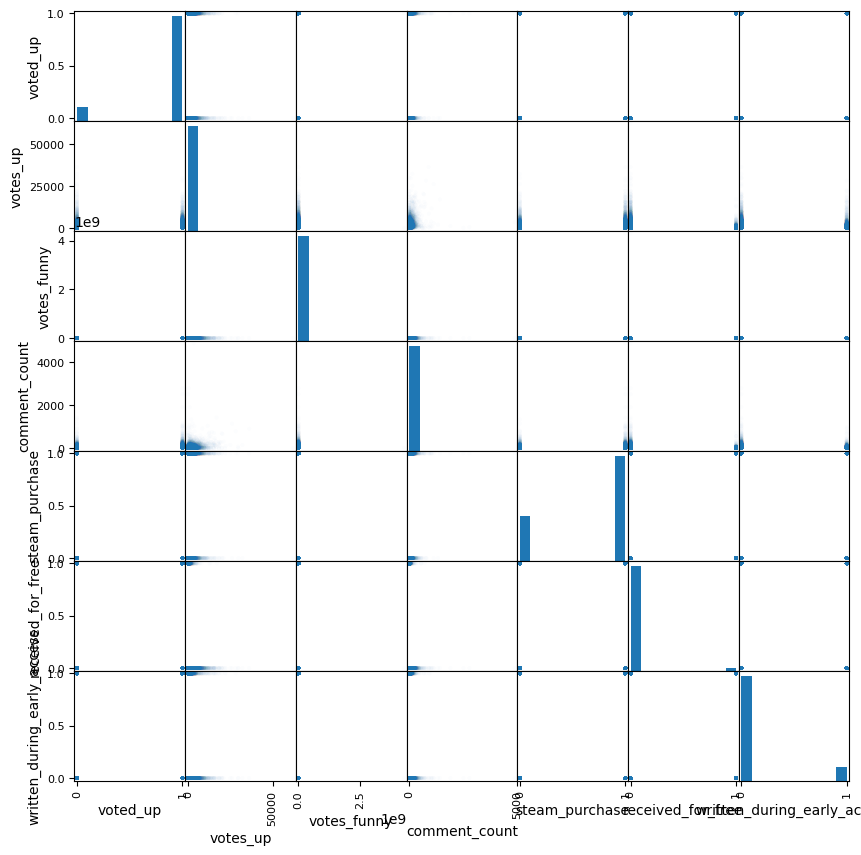

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (10, 10))

### Обрабатываем категориальные признаки с помощью векторизации

In [6]:
for str_col in ('game', 'language'):
    tmp = pd.get_dummies(df[str_col], dtype=np.int8)
    tmp = tmp.add_prefix(str_col + '_')
    df = pd.concat([df.drop(columns=[str_col]), tmp], axis=1)

### Проводим нормализацию количественных признаков

In [7]:
number_df = df[df_number_columns]
number_df.describe()

,votes_up,votes_funny,comment_count
count,200971.000000,2.009710e+05,200971.000000
mean,284.117101,2.147666e+04,5.648815
std,658.611393,9.580610e+06,25.239003
min,0.000000,0.000000e+00,0.000000
25%,75.000000,7.000000e+00,0.000000
50%,127.000000,2.700000e+01,0.000000
75%,261.000000,8.300000e+01,4.000000
max,62199.000000,4.294967e+09,4890.000000


In [8]:
number_df = (number_df - number_df.mean(axis = 0))/number_df.std(axis = 0)
number_df.describe()

,votes_up,votes_funny,comment_count
count,2.009710e+05,2.009710e+05,2.009710e+05
mean,-2.291035e-17,2.651661e-20,-9.333848e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.313881e-01,-2.241680e-03,-2.238129e-01
25%,-3.175121e-01,-2.240949e-03,-2.238129e-01
50%,-2.385581e-01,-2.238862e-03,-2.238129e-01
75%,-3.509976e-02,-2.233017e-03,-6.532806e-02
max,9.400822e+01,4.482957e+02,1.935239e+02


In [9]:
df = pd.concat([df.drop(columns=df_number_columns), number_df], axis=1)
df

,voted_up,steam_purchase,received_for_free,written_during_early_access,game_5D Chess With Multiverse Time Travel,game_7 Days to Die,game_ACE COMBAT™ 7: SKIES UNKNOWN,game_AI＊Shoujo/AI＊少女,game_ARK: Survival Evolved,game_ASTRONEER,...,language_spanish,language_swedish,language_tchinese,language_thai,language_turkish,language_ukrainian,language_vietnamese,votes_up,votes_funny,comment_count
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.281072,-0.002241,-0.223813
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.246150,-0.002241,-0.223813
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.478101,-0.002240,-0.104949
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.341806,-0.002240,-0.223813
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.237040,-0.002239,-0.223813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497722,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.051446,-0.002240,0.845960
497723,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.133792,-0.002240,-0.025707
497724,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.783289,-0.002232,0.925202
497725,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.077258,-0.002231,-0.223813


### X и y

In [10]:
X = df.drop(columns=['voted_up'])
y = df['voted_up'].to_numpy()
feature_names = X.columns
X = X.to_numpy()
N, d = X.shape

### Разбиваем данные на обучающие и тестовые выборки

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

140679 60292


### Используем метод RF - Random Forest (случайный лес) и вычисляем ошибки на тестовой и обучающей выборках

In [12]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.00039806936358660497 0.09011145757314404


### Значимость признаков

In [13]:
np.sum(rf.feature_importances_)

np.float64(1.0)

In [14]:
importances = rf.feature_importances_
sums = {}
indexes_to_delete = []

for f in range(d):
    tmp = feature_names[f].find('_')
    if not feature_names[f][:tmp] in df_string_columns:
        continue
    tmp = feature_names[f][:tmp]
    if (not tmp in sums.keys()):
        sums[tmp] = 0
    sums[tmp] += importances[f]
    indexes_to_delete.append(f)

importances = list(np.delete(importances, indexes_to_delete))
feature_names = list(np.delete(feature_names, indexes_to_delete))

importances.extend(sums.values())
feature_names.extend(sums.keys())

importances = np.array(importances, dtype=np.float64)
feature_names = np.array(feature_names)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(feature_names)):
    print(f"{f + 1} feature '{feature_names[indices[f]]}' ({importances[indices[f]]})") 

Feature ranking:
1 feature 'game' (0.4250335973772497)
2 feature 'votes_up' (0.21090462458409776)
3 feature 'votes_funny' (0.18364988357966291)
4 feature 'comment_count' (0.08890979593765867)
5 feature 'language' (0.06606474793913887)
6 feature 'steam_purchase' (0.013580558943085125)
7 feature 'written_during_early_access' (0.00721340064341535)
8 feature 'received_for_free' (0.004643390995691581)


(-1.0, 8.0)

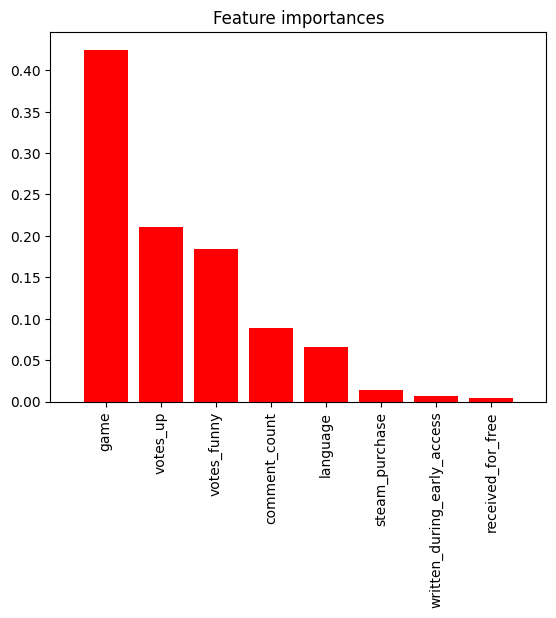

In [15]:
d_first = len(feature_names)
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Вывод

* Модель имеет высокую точность на тестовой выборке (91%).

* Наиболее влиятельные признаки - game, votes_up, votes_funny

# Решим задачу кластеризации

### Задача обучения без учителя кластеризация — это разбиение объектов на группы (кластеры), так, чтобы в одном кластере оказались "похожие" друг на друга объекты, а в разных кластерах — "мало похожие".

### Рассмотрим следующие методы:

* K-means (метод центров тяжессти или средних)

* DBSCAN (Density-based spatial clustering of applications with noise)

* BisectingKMeans (деления k-средних пополам)

In [16]:
from sklearn.cluster import KMeans, DBSCAN, BisectingKMeans
from sklearn.metrics import adjusted_rand_score, mutual_info_score

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

bkmeans = BisectingKMeans(n_clusters=2, random_state=42)
bkmeans_labels = bkmeans.fit_predict(X)

## Сравниваем результат кластеризации с истинными метками

### Рассмотрим следующие метрики:

* Adjusted Rand index
* Mutual info

In [18]:
def evaluate_clustering(true_labels, predicted_labels, method_name):
    ari = adjusted_rand_score(true_labels, predicted_labels)
    print(f"{method_name} ARI: {ari}")
    mutual = mutual_info_score(true_labels, predicted_labels)
    print(f"{method_name} Mutual info: {mutual}")
     
evaluate_clustering(y, kmeans_labels, "KMeans")
evaluate_clustering(y, dbscan_labels, "DBSCAN")
evaluate_clustering(y, bkmeans_labels, "Bisecting K-Means")

KMeans ARI: 0.031210331813907928
KMeans Mutual info: 0.0017802041435058154
DBSCAN ARI: -0.002503878089675682
DBSCAN Mutual info: 0.11582777867376887
Bisecting K-Means ARI: 0.031210331813907928
Bisecting K-Means Mutual info: 0.0017802041435058154


# Вывод

### В данном датасете методы кластеризации показали низкие значения метрик (ближе к 1 — лучше). Это означает, что данные сложно кластеризовать.

#### То есть стоит использовать обучение с учителем.